# A simple PCA example

In [1]:
versioninfo()

Julia Version 1.6.1
Commit 6aaedecc44* (2021-04-23 05:59 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.0 (ORCJIT, broadwell)


In [2]:
using Plots
gr() # use GR Plots backend

Plots.GRBackend()

## Generate some data

In [3]:
using Random, Distributions

In [4]:
v1 = [1., 1.]; v2 = [1., -1.];
d1 = Normal(0.0, 2.0); d2 = Normal(0.0, 1.0);
n  = 1000; # number of samples

data = [ [1., 0.5] + rand(d1)*v1 + rand(d2)*v2 for k=1:n ]
data = transpose(hcat(data...))

1000×2 transpose(::Matrix{Float64}) with eltype Float64:
  1.86565     3.2744
  1.21241     1.40206
  4.3259      3.15745
 -1.35776    -1.93649
  0.424037    0.216685
  5.82512     6.98187
 -2.7215     -3.56547
  4.29352    -0.221963
  3.12942     2.73624
  3.62115     2.5226
 -0.309377   -1.05536
  2.97561     4.584
  2.51907     1.88176
  ⋮          
 -2.46097    -2.67123
  0.547897    0.850752
  1.77932     0.218071
 -4.32726    -1.57056
 -1.83137    -0.657765
  1.01351     0.210524
  0.22554    -3.28636
  3.90924     3.36399
  3.45299     1.1002
  4.51546    -0.0169362
  5.62248     5.06756
  0.0481819  -0.0951522

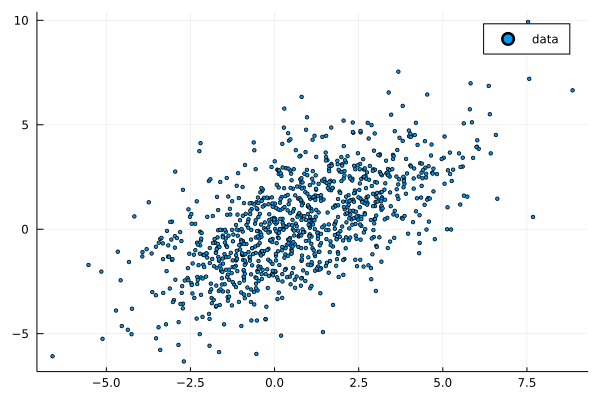

In [5]:
scatter(data[:, 1], data[:, 2], markersize=2, label="data")

## Compute the covariance matrix

In [6]:
using Statistics

In [7]:
m = [mean(data[:, 1]), mean(data[:, 2])]

2-element Vector{Float64}:
 0.7559133826207091
 0.3237789055951636

In [8]:
covmat = 1/n * [ sum([ (data[i, j] - m[1])*(data[i, k] - m[2]) for i=1:n ])  for j=1:2, k=1:2 ]

2×2 Matrix{Float64}:
 5.13532  3.23591
 3.04917  5.27797

## Compute its eigenvalues and eigenvectors

In [9]:
using LinearAlgebra

In [10]:
evals, evecs = eigen(covmat)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 2.0646832067024095
 8.348607336331979
vectors:
2×2 Matrix{Float64}:
 -0.725389  -0.709583
  0.68834   -0.704622

In [11]:
p1 = evals[1] * evecs[:, 1];
p2 = evals[2] * evecs[:, 2];

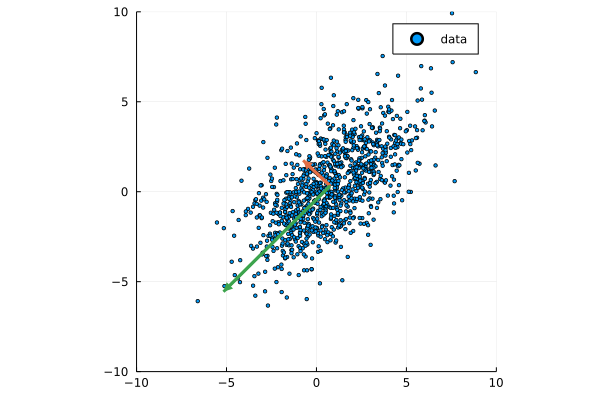

In [12]:
scatter(data[:, 1], data[:, 2], lims=(-10, 10), aspect_ratio=1, markersize=2, label="data")
plot!([m[1], m[1] + p1[1]], [m[2], m[2] + p1[2]], arrow=:closed, linewidth=3, label=nothing)
plot!([m[1], m[1] + p2[1]], [m[2], m[2] + p2[2]], arrow=:closed, linewidth=3, label=nothing)